In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.871353,1.904729,2.217291,-1.730404,-0.231441,0
1,-1.207635,0.371519,1.103829,-0.387434,-2.192691,1
2,0.157910,0.029294,-0.998658,2.411126,-1.006053,0
3,-0.860596,0.870193,2.694891,-0.183239,-1.216032,0
4,-1.024306,2.146138,2.050364,-0.799700,-0.941307,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [7]:
df1 = sample_rows(df,0.2)

In [8]:
df1

,col1,col2,col3,col4,col5,target
91,-0.908908,0.778036,2.205600,0.062870,-1.219099,0
80,-1.080769,1.413853,0.144625,2.251066,-0.712427,0
85,-2.039107,2.014217,2.258751,-0.019911,-2.238604,0
74,-1.002242,0.679850,-0.003473,0.817885,-2.319536,0
50,-3.360975,0.812804,0.511800,3.138715,-1.289978,0
18,-0.962434,1.651242,0.805798,0.162697,-0.598872,0
62,1.850029,1.391406,0.388799,-2.372810,-3.169319,1
89,-0.107886,0.416630,-0.542034,1.966008,-0.729855,0
94,2.586710,2.009676,3.288349,1.524195,0.955437,1
86,1.240256,1.898934,1.408338,1.523640,-0.158077,1


In [9]:
df2 = sample_rows(df,0.2)

In [10]:
df3 = sample_rows(df,0.2)

In [11]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(20, 6)
(20, 6)
(20, 6)


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[0] <= -0.011\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.5, 'x[1] <= 2.552\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

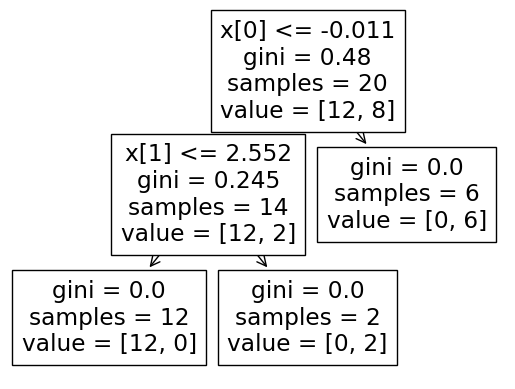

In [15]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[0] <= -0.433\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

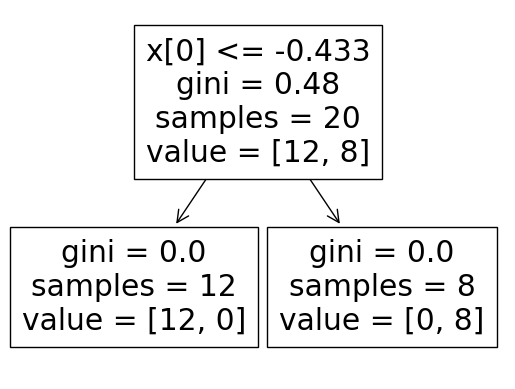

In [16]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[0] <= 0.547\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.625, 'x[3] <= -0.138\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[1] <= 0.441\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

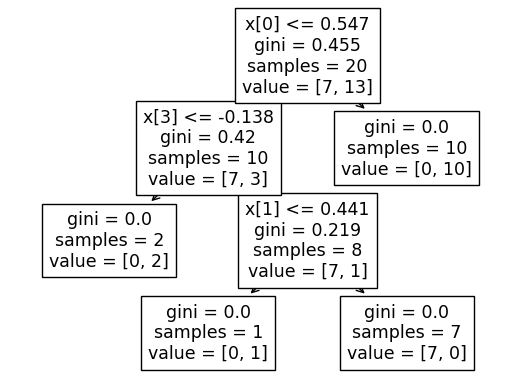

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([0.551388,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([0.551388,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf3.predict(np.array([0.551388,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
df1=sample_features(df,0.8)

/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [22]:
df2=sample_features(df,0.8)

/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [23]:
df3=sample_features(df,0.8)

/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [25]:
clf1.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:3],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:3],df3.iloc[:,-1])

DecisionTreeClassifier()

In [26]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'col5', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'col1', 'col4', 'target'], dtype='object')
Index(['col3', 'col1', 'col4', 'col5', 'target'], dtype='object')


In [27]:
df3

,col3,col1,col4,col5,target
0,2.217291,0.871353,-1.730404,-0.231441,0
1,1.103829,-1.207635,-0.387434,-2.192691,1
2,-0.998658,0.157910,2.411126,-1.006053,0
3,2.694891,-0.860596,-0.183239,-1.216032,0
4,2.050364,-1.024306,-0.799700,-0.941307,0
...,...,...,...,...,...
95,-1.365444,1.293019,1.036633,-0.682694,1
96,1.261081,2.351598,2.074269,1.098936,1
97,1.313770,1.137728,-0.615384,-0.907785,1
98,1.184683,-2.609590,-1.126148,-2.941742,1


[Text(0.7017045454545454, 0.95, 'x[1] <= 0.307\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4943181818181818, 0.85, 'x[2] <= -2.71\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.44886363636363635, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5397727272727273, 0.75, 'x[2] <= -0.135\ngini = 0.307\nsamples = 58\nvalue = [47, 11]'),
 Text(0.3522727272727273, 0.65, 'x[1] <= 0.056\ngini = 0.256\nsamples = 53\nvalue = [45, 8]'),
 Text(0.20454545454545456, 0.55, 'x[2] <= -2.084\ngini = 0.19\nsamples = 47\nvalue = [42, 5]'),
 Text(0.09090909090909091, 0.45, 'x[2] <= -2.216\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.045454545454545456, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13636363636363635, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3181818181818182, 0.45, 'x[2] <= -0.571\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.22727272727272727, 0.35, 'x[1] <= -1.595\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 T

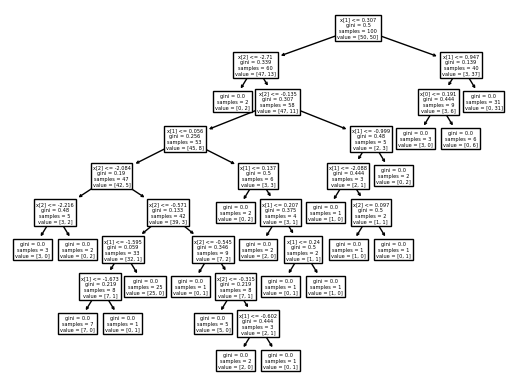

In [28]:
plot_tree(clf1)

[Text(0.5972222222222222, 0.9444444444444444, 'x[2] <= 0.307\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3055555555555556, 0.8333333333333334, 'x[1] <= -1.473\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.25, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3611111111111111, 0.7222222222222222, 'x[0] <= -2.71\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(0.3055555555555556, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4166666666666667, 0.6111111111111112, 'x[0] <= -0.315\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -1.785\ngini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(0.1111111111111111, 0.3888888888888889, 'x[0] <= -2.216\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16666666666666666, 0.2777777777777778, 'x[1] <= 0.471\ngini = 0.48\nsamples = 5\nvalue = [2,

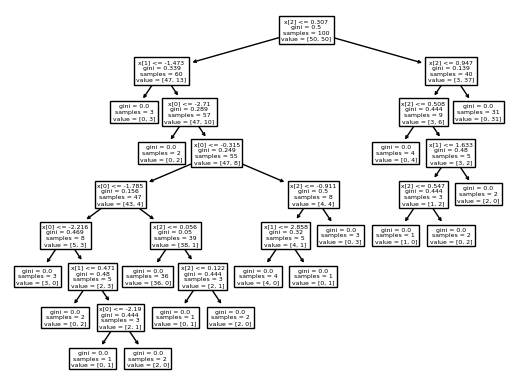

In [29]:
plot_tree(clf2)

[Text(0.5, 0.9545454545454546, 'x[1] <= 0.307\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2692307692307692, 0.8636363636363636, 'x[0] <= -1.473\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.19230769230769232, 0.7727272727272727, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.34615384615384615, 0.7727272727272727, 'x[2] <= -1.115\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(0.2692307692307692, 0.6818181818181818, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4230769230769231, 0.6818181818181818, 'x[0] <= 3.197\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.34615384615384615, 0.5909090909090909, 'x[1] <= -2.115\ngini = 0.226\nsamples = 54\nvalue = [47, 7]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 0.917\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.07692307692307693, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23076923076923078, 0.4090909090909091, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.

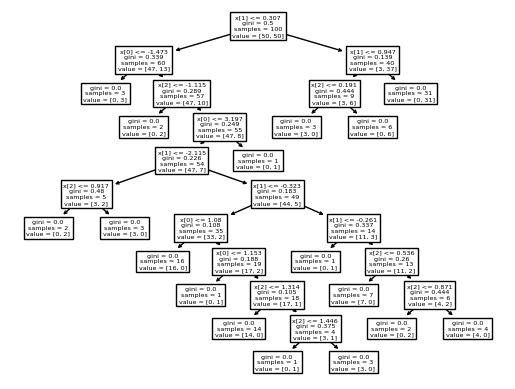

In [30]:
plot_tree(clf3)

In [31]:
clf1.predict(np.array([0.021498	,1.192081,	1.187788]).reshape(1,3))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
clf2.predict(np.array([0.021498	,1.192081,	1.187788]).reshape(1,3))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
clf3.predict(np.array([0.021498	,1.192081,	1.187788]).reshape(1,3))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [35]:
df2= combined_sampling(df,0.5,0.5)


/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df3 = combined_sampling(df,0.5,0.5)


/tmp/ipykernel_18/516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['col5', 'col1', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [38]:
df3

,col1,col5,target
53,1.263543,-1.001116,1
92,-1.765307,-1.532919,0
24,2.158515,-1.312483,1
66,-0.880692,-0.017024,1
66,-0.880692,-0.017024,1
63,-0.164194,-1.375707,0
30,-0.382585,-1.620554,0
69,1.564356,-0.885829,1
92,-1.765307,-1.532919,0
65,0.508794,-1.189023,0


In [39]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [40]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[1] <= -0.188\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.25, 0.7, 'x[0] <= -2.712\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.75, 0.7, 'x[1] <= 0.658\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.625, 0.5, 'x[0] <= -0.654\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.3, 'x[1] <= 0.604\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]')]

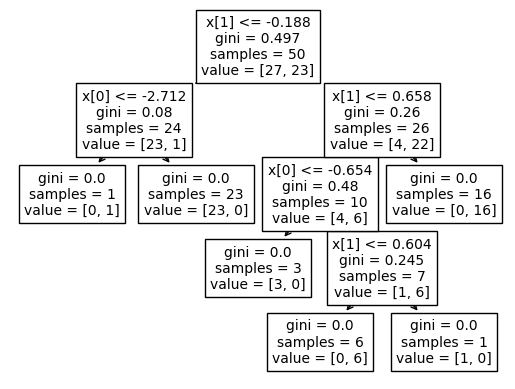

In [41]:
plot_tree(clf1)

[Text(0.5454545454545454, 0.95, 'x[0] <= 0.484\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2727272727272727, 0.85, 'x[1] <= 2.45\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.18181818181818182, 0.75, 'x[1] <= 0.575\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.09090909090909091, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.65, 'x[0] <= -0.934\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.18181818181818182, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.55, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8181818181818182, 0.85, 'x[1] <= 1.243\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.7272727272727273, 0.75, 'x[1] <= 0.677\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(0.6363636363636364, 0.65, 'x[0] <= 3.909\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.54545454545454

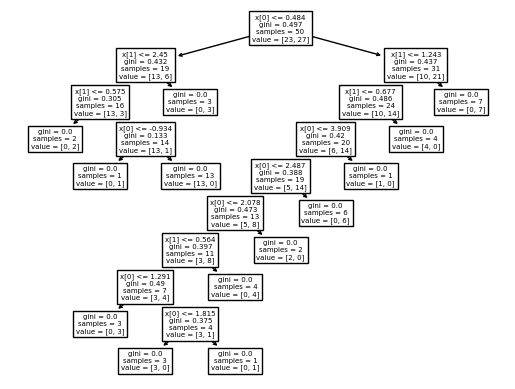

In [42]:
plot_tree(clf2)


[Text(0.7142857142857143, 0.9166666666666666, 'x[0] <= 0.601\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.5714285714285714, 0.75, 'x[1] <= -0.084\ngini = 0.36\nsamples = 34\nvalue = [26, 8]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[1] <= -1.854\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[0] <= -2.111\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.25, 'x[1] <= -2.216\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.4166666666666667, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.7142857142857143, 0.5833333333333334, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8571428571428571, 0.75, 'gini = 0

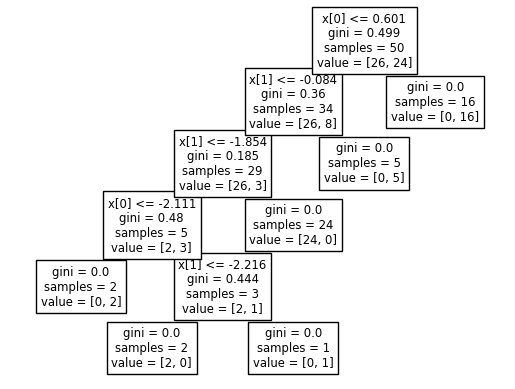

In [43]:
plot_tree(clf3)


In [44]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [45]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])